In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All the packages needed.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [ ]:
#importing dataset
white_wine_data = pd.read_csv('/content/drive/MyDrive/White wine/winequality-white.csv', delimiter=';')

In [ ]:
# Quantity is the value we are predicting at the end.
# Setting a threshold.
# To classify quantity properly we are converting the value of all qualtity > 5 as 1 and quantity < 5 as 0
# Using numpy.where(), elements of the NumPy array ndarray that satisfy the conditions can be replaced or performed specified processing.
white_wine_data['quality'] = np.where(white_wine_data['quality'] > 5, 1 , 0)

# Printing the changed values.
white_wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [ ]:
# PRinting the number of 0's and 1's
white_wine_data['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

OUTLINER

In [ ]:
#An outlier is a data point in a data set that is distant from all other observations.
#A data point that lies outside the overall distribution of the dataset.
#What is the reason for an outlier to exists in a dataset?

#An outlier could exist in a dataset due to

#Variability in the data
#An experimental measurement error

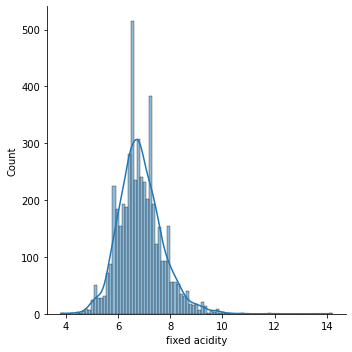

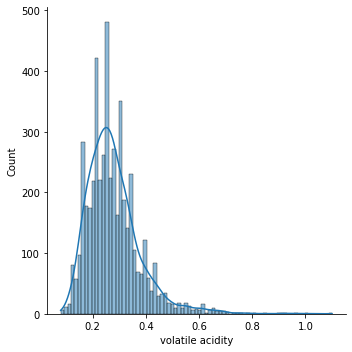

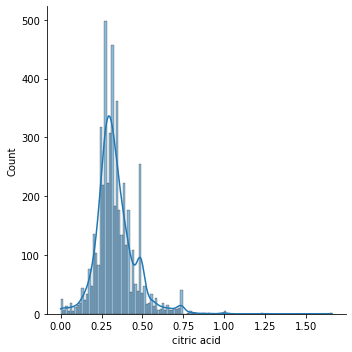

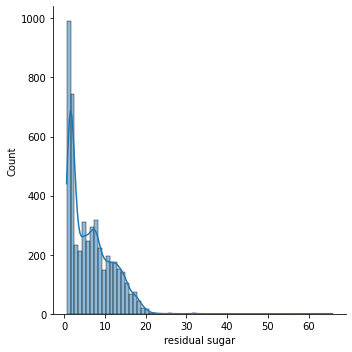

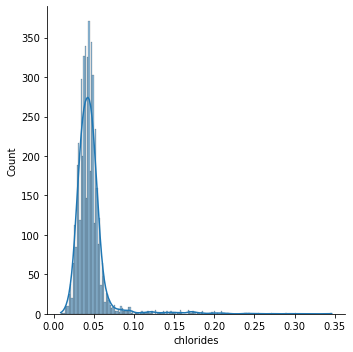

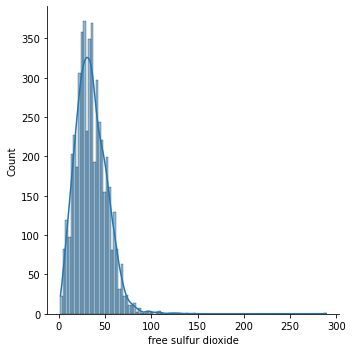

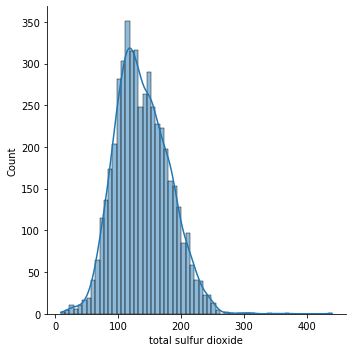

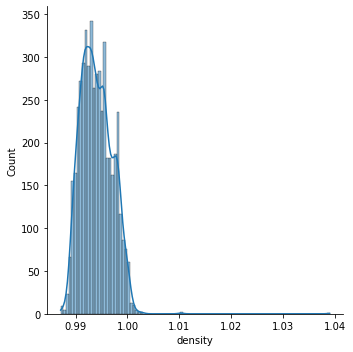

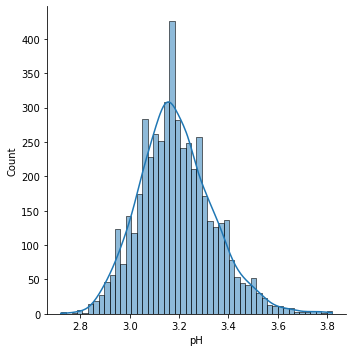

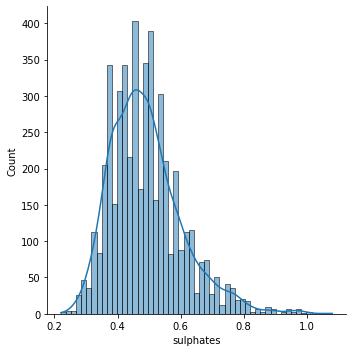

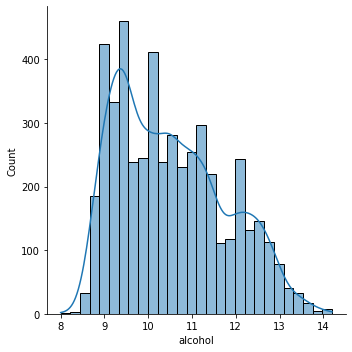

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for cols in white_wine_data.columns[:-1]:
    sns.displot(white_wine_data[cols],kde =True)


In [ ]:
# Finding boudnry values for outliers
outliers_values = []
for cols in white_wine_data.columns[:-1]:
    high = white_wine_data[cols].mean() + 1.5*white_wine_data[cols].std()
    low = white_wine_data[cols].mean() - 1.5*white_wine_data[cols].std()
    print(f"Highest allowed for {cols} is {high} and Lowest allowed is {low}")
    outliers_values.append([low,high,cols])

Highest allowed for fixed acidity is 8.120590009967353 and Lowest allowed is 5.5889853269047975
Highest allowed for volatile acidity is 0.4294329414613073 and Lowest allowed is 0.12704929618671446
Highest allowed for citric acid is 0.5157212130419119 and Lowest allowed is 0.15266180043296285
Highest allowed for residual sugar is 13.999501539231783 and Lowest allowed is -1.2166718128128098
Highest allowed for chlorides is 0.07854430820429273 and Lowest allowed is 0.013000403923106273
Highest allowed for free sulfur dioxide is 60.81879092047441 and Lowest allowed is 9.79737894477671
Highest allowed for total sulfur dioxide is 202.10775424240265 and Lowest allowed is 74.61356057997384
Highest allowed for density is 0.998513736855595 and Lowest allowed is 0.9895410161047842
Highest allowed for pH is 3.4147675388672694 and Lowest allowed is 2.961765740022069
Highest allowed for sulphates is 0.6610356271992797 and Lowest allowed is 0.3186581253527854
Highest allowed for alcohol is 12.3601978

In [ ]:
out_df = pd.DataFrame([],columns = white_wine_data.columns)
for vals in outliers_values:
    low = vals[0]
    high = vals[1]
    cols = vals[-1]
    out_df = out_df.append(white_wine_data[(white_wine_data[cols] > high) | (white_wine_data[cols] < low)], ignore_index=True)

In [ ]:
out_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,0
1,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,0
2,8.5,0.240,0.39,10.40,0.044,20.0,142.0,0.99740,3.20,0.53,10.0,1
3,8.3,0.140,0.34,1.10,0.042,7.0,47.0,0.99340,3.47,0.40,10.2,1
4,8.6,0.230,0.46,1.00,0.054,9.0,72.0,0.99410,2.95,0.49,9.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5496,6.2,0.360,0.32,4.00,0.036,44.0,92.0,0.98936,3.20,0.50,13.3,1
5497,6.2,0.355,0.35,2.00,0.046,31.0,95.0,0.98822,3.06,0.46,13.6,1
5498,5.3,0.600,0.34,1.40,0.031,3.0,60.0,0.98854,3.27,0.38,13.0,1
5499,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.0,1


In [ ]:
out_df.shape

(5501, 12)

In [ ]:
# Capping the outliers
"""In this strategy, we cap our outliers data and establish a limit, i.e., if the value is more than
or less than a certain threshold, all values are deemed outliers, and the number of outliers in the
dataset determines the capping number.
"""
for cols in out_df.columns:
    upper_limit = white_wine_data[cols].mean() + 1.5*white_wine_data[cols].std()
    lower_limit = white_wine_data[cols].mean() - 1.5*white_wine_data[cols].std()
    out_df[cols] = np.where(out_df[cols]>upper_limit,upper_limit,np.where(out_df[cols]<lower_limit,lower_limit,out_df[cols]))

In [ ]:
out_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.120590,0.230000,0.400000,4.200000,0.035,17.000000,109.000000,0.994700,3.140000,0.530000,9.700000,0
1,8.120590,0.420000,0.515721,13.999502,0.040,41.000000,172.000000,0.998514,2.980000,0.661036,9.700000,0
2,8.120590,0.240000,0.390000,10.400000,0.044,20.000000,142.000000,0.997400,3.200000,0.530000,10.000000,1
3,8.120590,0.140000,0.340000,1.100000,0.042,9.797379,74.613561,0.993400,3.414768,0.400000,10.200000,1
4,8.120590,0.230000,0.460000,1.000000,0.054,9.797379,74.613561,0.994100,2.961766,0.490000,9.100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5496,6.200000,0.360000,0.320000,4.000000,0.036,44.000000,92.000000,0.989541,3.200000,0.500000,12.360198,1
5497,6.200000,0.355000,0.350000,2.000000,0.046,31.000000,95.000000,0.989541,3.060000,0.460000,12.360198,1
5498,5.588985,0.429433,0.340000,1.400000,0.031,9.797379,74.613561,0.989541,3.270000,0.380000,12.360198,1
5499,6.200000,0.410000,0.220000,1.900000,0.023,9.797379,74.613561,0.989541,3.040000,0.661036,12.360198,1


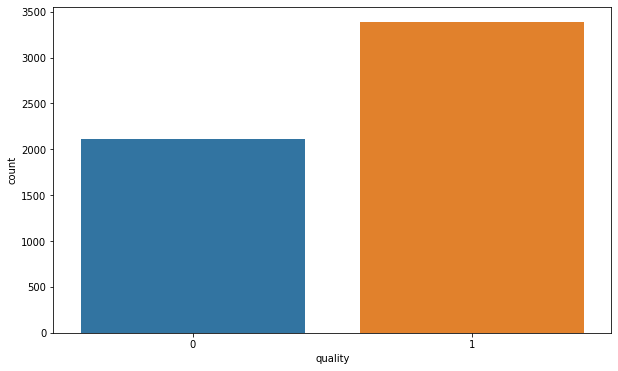

In [ ]:
# Plotting the quality
# There is a significant increase from the previous value count for target columns
plt.figure(figsize=(10,6))
sns.countplot(out_df['quality'])

In [ ]:
# PRinting the number of 0's and 1's
out_df['quality'].value_counts()

1    3385
0    2116
Name: quality, dtype: int64

ID3


In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score,train_test_split
X = out_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = out_df.quality
X_test, X_train, y_test, y_train = train_test_split(X, y.astype('int'), test_size=0.30, random_state=111)
clf = tree.DecisionTreeClassifier()
clf_model = clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)


[Text(0.711681450026233, 0.9761904761904762, 'X[10] <= 11.75\ngini = 0.472\nsamples = 1651\nvalue = [631, 1020]'),
 Text(0.48291169333683104, 0.9285714285714286, 'X[1] <= 0.285\ngini = 0.5\nsamples = 1218\nvalue = [601, 617]'),
 Text(0.2053629984260231, 0.8809523809523809, 'X[1] <= 0.207\ngini = 0.46\nsamples = 734\nvalue = [263, 471]'),
 Text(0.07541972717733474, 0.8333333333333334, 'X[5] <= 13.5\ngini = 0.38\nsamples = 275\nvalue = [70, 205]'),
 Text(0.02098635886673662, 0.7857142857142857, 'X[4] <= 0.039\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.012591815320041973, 0.7380952380952381, 'X[8] <= 3.357\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.008394543546694649, 0.6904761904761905, 'X[8] <= 3.185\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.004197271773347324, 0.6428571428571429, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.012591815320041973, 0.6428571428571429, 'X[7] <= 0.992\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.00839

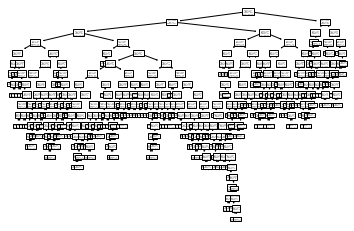

In [ ]:
tree.plot_tree(clf)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('ID3\n')

# To print the confusion matrix
print('The confusion matrix is: ' + '\n \n',confusion_matrix(y_test,clf_predict))

# To print the classification report
print('\nThe classification report is: ' + '\n \n',classification_report(y_test,clf_predict))

acc_score = round(accuracy_score(y_test,clf_predict)*100,2)
print(f'Accuracy of our model is: {acc_score}')

ID3

The confusion matrix is: 
 
 [[1163  322]
 [ 356 2009]]

The classification report is: 
 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1485
           1       0.86      0.85      0.86      2365

    accuracy                           0.82      3850
   macro avg       0.81      0.82      0.81      3850
weighted avg       0.82      0.82      0.82      3850

Accuracy of our model is: 82.39


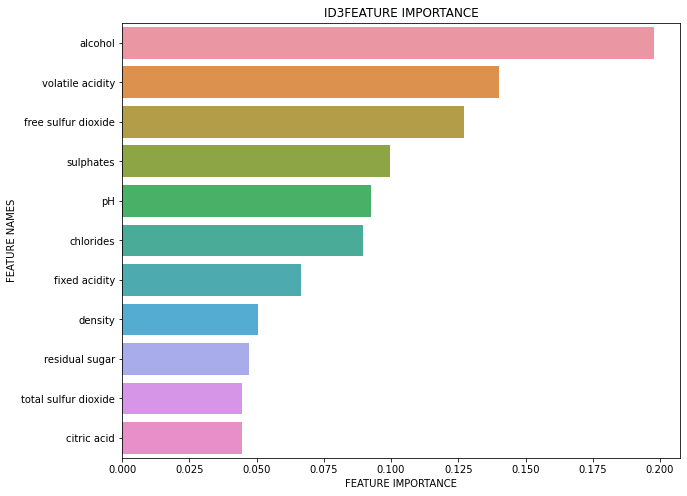

In [ ]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
   feature_importance = np.array(importance)
   feature_names = np.array(names)

#Create a DataFrame using a Dictionary
   data={'feature_names':feature_names,'feature_importance':feature_importance}
   fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
   fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
   plt.figure(figsize=(10,8))
#Plot Searborn bar chart
   sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
   plt.title(model_type + 'FEATURE IMPORTANCE')
   plt.xlabel('FEATURE IMPORTANCE')
   plt.ylabel('FEATURE NAMES')

plot_feature_importance(clf.feature_importances_,X_train.columns,"ID3")

In [ ]:
# Tunning our model wither using the grid search or using the hyper parameters
# Considering the n_estimators as hyper parameter
hyperList = np.arange(50,210,10)
hyperOutput = []
for val in hyperList:
    rfHyper = tree.DecisionTreeClassifier()
    rfHyper.fit(X_train,y_train)
    predictHyper = clf.predict(X_test)
    print(f'Accuracy score at {val}th estimator is {round(accuracy_score(y_test,predictHyper)*100,2)}')
    hyperOutput.append(round(accuracy_score(y_test,predictHyper)*100,2))

Accuracy score at 50th estimator is 82.23
Accuracy score at 60th estimator is 82.23
Accuracy score at 70th estimator is 82.23
Accuracy score at 80th estimator is 82.23
Accuracy score at 90th estimator is 82.23
Accuracy score at 100th estimator is 82.23
Accuracy score at 110th estimator is 82.23
Accuracy score at 120th estimator is 82.23
Accuracy score at 130th estimator is 82.23
Accuracy score at 140th estimator is 82.23
Accuracy score at 150th estimator is 82.23
Accuracy score at 160th estimator is 82.23
Accuracy score at 170th estimator is 82.23
Accuracy score at 180th estimator is 82.23
Accuracy score at 190th estimator is 82.23
Accuracy score at 200th estimator is 82.23


In [ ]:
rfc_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
val = round(rfc_eval.mean()*100,2)
hyperScore = round((sum(hyperOutput)/len(hyperOutput)),2)

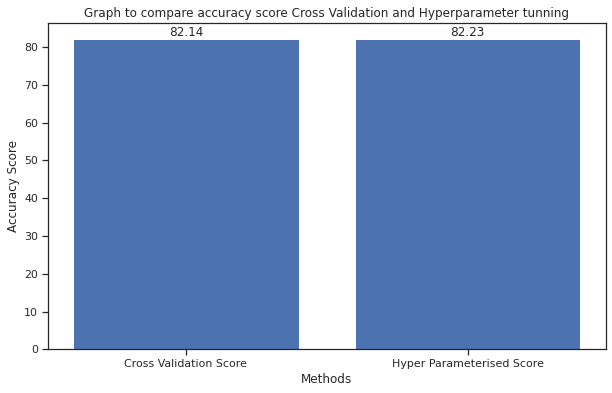

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(['Cross Validation Score','Hyper Parameterised Score'],[val,hyperScore])
plt.title('Graph to compare accuracy score Cross Validation and Hyperparameter tunning')
plt.xlabel('Methods')
plt.ylabel('Accuracy Score')
for i in range(len([val,hyperScore])):
            plt.annotate(str([val,hyperScore][i]), xy=(['Cross Validation Score','Hyper Parameterised Score'][i],[val,hyperScore][i]), ha='center', va='bottom')